# QESEM: Qedma による Qiskit Function

<Admonition type="note">
  Qiskit Functionsは、IBM Quantum™ Premium Plan ユーザーのみが利用できる実験的な機能です。プレビュー リリースの状態であり、変更される可能性があります。 
</Admonition>

## 概要
量子処理装置は近年大幅に改善されましたが、既存のハードウェアのノイズや欠陥によるエラーは、量子アルゴリズム開発者にとって依然として大きな課題です。この分野が従来の方法では検証できない実用規模の量子計算に近づくにつれて、精度を保証しながらノイズをキャンセルするソリューションがますます重要になっています。この課題を克服するために、Qedma は、IBM Quantum Platform に[Qiskit Function](/guides/functions)としてシームレスに統合された Quantum Error Suppression and Error Mitigation (QESEM) を開発しました。

QESEM を使用すると、ユーザーは量子回路をノイズの多い QPU で実行して、基本境界に近い、非常に効率的な QPU 時間オーバーヘッドで、非常に正確でエラーのない結果を得ることができます。これを実現するために、QESEM は Qedma が開発した独自の方法スイートを活用して、エラーの特性評価と削減を行います。エラー削減手法には、ゲート最適化、ノイズを考慮したトランスパイル、エラー抑制 (ES)、およびバイアスのないエラー緩和 (EM) が含まれます。これらの特性評価ベースの方法を組み合わせることで、ユーザーは一般的な大容量の量子回路で信頼性の高いエラーのない結果を実現し、他の方法では実現できないアプリケーションを実現できます。


## 説明

Qedma の QESEM 機能を使用すると、エラーを抑制および軽減しながら回路を簡単に推定および実行し、より大きな回路ボリュームとより高い精度を実現できます。QESEM を使用するには、量子回路、測定するオブバーバブルのセット、各オブザーバブルの目標とする統計的な精度、および選択した QPU を指定します。回路を目標精度まで実行する前に、回路の実行を必要としない分析計算に基づいて必要な QPU 時間を推定できます。QPU 時間の推定に満足したら、QESEM で回路を実行できます。

回路を実行すると、QESEM は回路に合わせて調整されたデバイス特性評価プロトコルを実行し、回路で発生するエラーに対する信頼性の高いノイズ モデルを生成します。特性評価に基づいて、QESEM は最初にノイズを考慮したトランスパイルを実装し、入力回路を一連の物理量子ビットとゲートにマッピングします。これにより、目標であるオブバーバブルに影響を与えるノイズが最小限に抑えられます。これらには、ネイティブで使用可能なゲート (IBM® デバイスの CX/CZ) と、QESEM によって最適化された追加のゲートが含まれ、QESEM の拡張ゲート セットを形成します。次に、QESEM は QPU で特性評価ベースの ES および EM 回路のセットを実行し、その測定結果を収集します。次に、これらは従来の方法で後処理され、要求された精度に対応する各オブザーバブルの偏りのない期待値とエラー バーが出力されます。

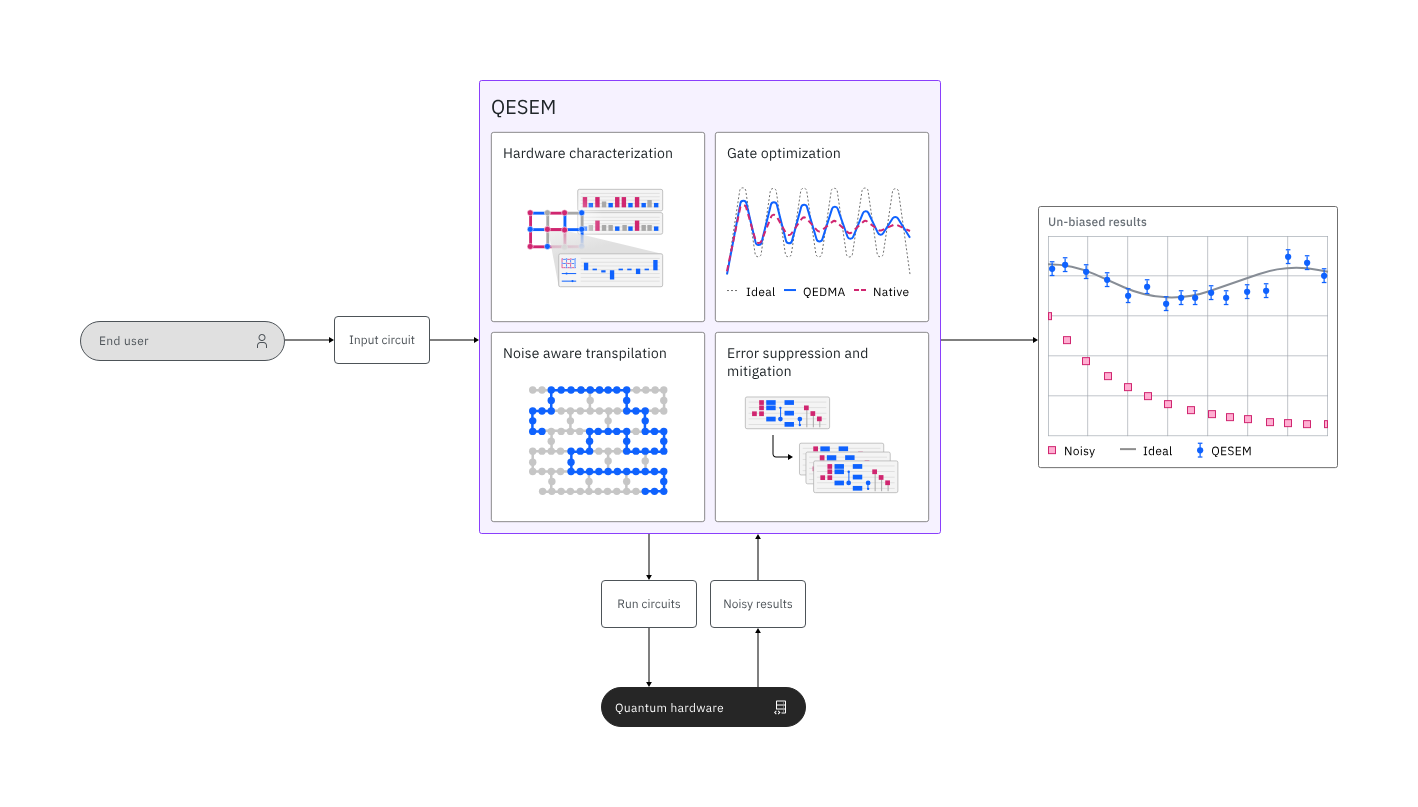

## 独自のエラー緩和機能

QESEM は、さまざまな量子アプリケーションと、現在実現可能な最大の回路ボリュームに対して、高精度の結果を提供することが実証されています。QESEM は、以下のベンチマーク セクションで実証されているように、次のユーザー向け機能を提供します。

1.  **保証された精度:** QESEM は、オブザーバブルの期待値に対して偏りのない推定値を出力します。その EM 法には理論的な保証が備わっており、Qedma の最先端の特性評価と相まって、緩和策がユーザー指定の精度までノイズのない回路出力に収束することを保証します。体系的なエラーやバイアスが発生しやすい多くのヒューリスティックな EM 法とは対照的に、QESEM の保証された精度は、一般的な量子回路とオブザーバブルに信頼性の高い結果を保証するために不可欠です。

2.  **大規模 QPU へのスケーラビリティ:** QESEM の QPU 時間は回路ボリュームに依存しますが、それ以外は量子ビットの数とは無関係です。Qedma は、IBM Quantum 127 量子ビット Eagle や 133 量子ビット Heron デバイスなど、現在入手可能な最大の量子デバイスで QESEM を実証しました。

3.  **アプリケーションに依存しない:** QESEM は、ハミルトン シミュレーション、VQE、QAOA、振幅推定など、さまざまなアプリケーションで実証されています。ユーザーは、測定する任意の量子回路とオブザーバブルを入力し、正確でエラーのない結果を得ることができます。唯一の制限は、アクセス可能な回路ボリュームと出力精度を決定するハードウェア仕様と割り当てられた QPU 時間によって決まります。対照的に、多くのエラー削減ソリューションはアプリケーション固有であるか、制御されていないヒューリスティックを伴うため、一般的な量子回路やアプリケーションには適用できません。

4.  **拡張ゲートセット：** QESEM は分数の角度ゲートをサポートし、IBM Quantum Eagle デバイス上で Qedma に最適化された分数の角度 $Rzz(\theta)$ ゲートを提供します。この拡張ゲートセットにより、より効率的なコンパイルが可能になり、デフォルトのCX/CZコンパイルに比べて最大2倍の回路ボリュームが実現できます。

5.  **複数基底オブザーバブル:** QESEM は、汎用ハミルトニアンなどの多くの非可換パウリ文字列で構成されるオブザーバブルの入力をサポートします。測定基底の選択と QPU リソース割り当て (ショットと回路) の最適化は、要求された精度に必要な QPU 時間を最小限に抑えるために QESEM によって自動的に実行されます。ハードウェアの忠実度と実行速度を考慮したこの最適化により、より深い回路を実行し、より高い精度を得ることができます。



## Function パラメーター

| Name |  Type | Description | Required | Default |  Example |
| -----| ------| ------------| -------- | ------- | -------- |
| `instance` | str|  The hub/group/project to use in that format |  No |  N/A | “hub1/group1/project1”  |
| `action` | str | The required action: "estimate\_qpu\_time" or "execute" |  Yes  | N/A | "execute" |
| `pubs` | Iterable\[EstimatorPubLike] | A pub-like object in the form of (circuit, observables) |  Yes|  N/A |  (circ1, \[obs1,obs2,obs3])  |
| `precision` | float | The target precision for expectation value estimates of each observable |  Yes|  N/A |  0.03  |
| `run_options` | dict | Includes the name of the backend to run on | Yes | N/A  |  `{ backend_name = "ibm_fez" }`  |
| `custom_options` |dict |  Advanced features: `transpilation_level` and `max_qpu_time` (in seconds)|  No  | `max_qpu_time` = 14400 , `transpilation_level`= 1  | `{ max_qpu_time = 14400, transpilation_level = 0 }` |


## 始めてみましょう
[IBM Quantum Platform API token](http://quantum.ibm.com/) を使用して認証し、次のように Qiskit Function を選択します。


In [ ]:
from qiskit_ibm_catalog import QiskitFunctionsCatalog

catalog = QiskitFunctionsCatalog(instance="")

qesem  = catalog.load('qedma/qesem')

## 例

QESEM function を実行するには、次のパラメーターを取得する必要があります。

*   action

*   pubs (circuit, observables)

*   precision

*   run\_options

まず、QPU 時間を見積もる基本的な例を試してください：

In [ ]:
job = qesem_function.run(
    action = "estimate_qpu_time",
    instance = "hub/group/project",
    pubs = [
        (
            bell,
            [obs1,obs2,obs3]
        )
    ],
    precision = 0.03,
    run_options = {
        backend_name = "ibm_brisbane",
    }
)

次の例では、QESEM job を実行します。


In [ ]:
# example execute QESEM job
job = qesem_function.run(
    action = "execute",
    instance = "hub/group/project",
    pubs = [
        (
            bell,
            [obs1,obs2,obs3]
        )
    ],
    precision = 0.03,
    run_options = {
        backend_name = "ibm_brisbane",
    }
)

<Admonition type="note">

  *   この `precision` パラメーターは、オブザーバブルの期待値に対する許容誤差を絶対値で表します。つまり、緩和のための QPU 実行時間は、対象となるすべてのオブザーバブルについて、目標精度の信頼区間 `1σ` に収まる出力値を提供するように決定されます。複数のオブザーバブルが提供される場合、各入力オブザーバブルの目標精度に達するまで緩和が実行されます。

  *   現在、QESEM は単一の `PUB` をサポートしています。
</Admonition>


使い慣れた Qiskit Serverless API を使用して、Qiskit Function ワークロードのステータスを確認したり、結果を返したりできます。



In [ ]:
print(job.status())
result = job.result()

## カスタムオプション

`custom_options` パラメーターを用意して、QESEM function に追加の高度な機能を設定します：

In [ ]:
# example execute QESEM job
job = qesem_function.run(
    action = "execute",
    instance = "hub/group/project",
    pubs = [
        (
            bell,
            [obs1,obs2,obs3]
        )
    ],
    precision = 0.03,
    run_options = {
        backend_name = "ibm_brisbane",
    },
    custom_options = {
        max_qpu_time = 14400,
        transpilation_level = 0
    }
)

`max_qpu_time`: QESEM プロセス全体で使用される QPU 時間を秒単位で制限できます。目標精度に到達するために必要な最終的な QPU 時間は QESEM ジョブ中に動的に決定されるため、このパラメーターを使用すると実験のコストを制限できます。動的に決定された QPU 時間がユーザーが割り当てた時間よりも短い場合、このパラメーターは実験に影響しません。この `max_qpu_time` パラメーターは、ジョブ開始前に QESEM によって提供される分析時間の見積もりがあまりにも悲観的で、ユーザーがとにかく緩和ジョブを開始したい場合に特に有用です。時間制限に達すると、QESEM は新しい回路の送信を停止します。すでに送信された回路は実行を継続し (合計時間は最大 30 分制限を超える場合があります)、ユーザーはその時点までに実行された回路から処理された結果を受け取ります。分析時間の見積もりよりも短い QPU 時間制限を適用する場合は、Qedma に問い合わせて、時間制限内で達成可能な精度の見積もりを取得してください。

`transpilation_level`: 回路が QESEM に送信されると、QESEM は自動的にいくつかの代替回路トランスパイルを準備し、QPU 時間を最小化するトランスパイルを選択します。たとえば、代替トランスパイルでは、Qedma に最適化された分数 RZZ ゲートを使用して回路の深さを減らすことができます。もちろん、すべてのトランスパイルは、理想的な出力という点で入力回路と等価です。

回路のトランスピレーションをよりコントロールするには、`QesemOptions` でトランスピレーション・レベルを設定します。‘level 1’ は上述のデフォルトの動作に対応しますが、‘level 0’ は高精度出力に必要な最小限の修正のみを含みます。例えば、‘レイヤー化’ -回路操作を同時2量子ビットゲートの ‘レイヤー’ に編成することです。どのような場合でも、高忠実度量子ビットへの自動ハードウェアマッピングが適用されることに注意してください。

| `transpilation_level` | description |
|:-:|:--|
| `1` | デフォルトの QESEM トランスパイル。複数の代替トランスパイルを準備し、QPU 時間を最小化するトランスパイルを選択します。レイヤー化ステップでバリアを変更できます。|
| `0` | 最小限のトランスパイル: 緩和された回路は、構造的に入力回路と非常に類似します。レベル 0 で提供される回路は、デバイスの接続と一致し、次のゲートで指定する必要があります: CX、Rzz(α)、および標準のシングル キュービット ゲート (U、x、sx、rz など)。レイヤー化のステップでは、バリアが尊重されます。  |

<Admonition type="note">
 
 Qiskit barriersは通常、量子回路の 2 量子ビット ゲートのレイヤーを指定するために使用されます。レベル 0 では、QESEM はバリアによって指定されたレイヤーを保持します。レベル 1 では、バリアによって指定されたレイヤーは、QPU 時間を最小限に抑える際の 1 つのトランスパイルの選択肢として考慮されます。
</Admonition>


## ベンチマーク

QESEM は、さまざまなユースケースとアプリケーションでテストされています。次の例は、QESEM で実行できるワークロードの種類を評価するのに役立ちます。

特定の回路とオブザーバブルに対するエラー緩和と古典的シミュレーションの両方の困難さを定量化するための重要な指標は、**アクティブボリューム** です。アクティブボリュームとは、回路内のオブザーバブルに影響を与える CNOT ゲートの数です。アクティブボリュームは、回路の深さと幅、オブザーバブルの重み、およびオブザーバブルのライトコーンを決定する回路構造に依存します。詳細については、[2024 IBM Quantum Summit](https://www.youtube.com/watch?v=Hd-IGvuARfE\&t=1730s) の講演を参照してください。QESEM は、高ボリューム領域で特に大きな価値を提供し、一般的な回路とオブザーバブルに対して信頼性の高い結果をもたらします。

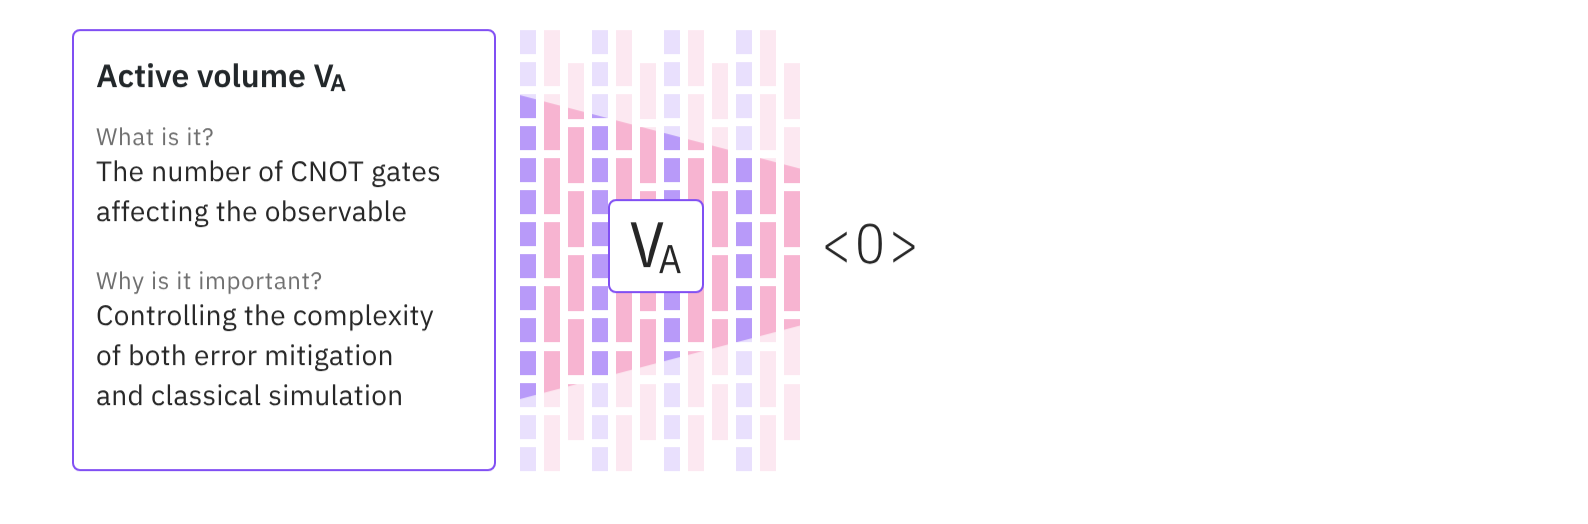

| 応用例    | 量子ビット数 | デバイス | 回路の説明 | 精度 | 合計時間 | Runtime usage |
| ---------  | ---------------- | ----- | -------------------------- | -------- | ---------- | ------------- |
| VQE circuit  | 8              | Eagle (r3) | 21 total layers, 9 measurement bases, 1D chain                    | 98%      | 35 min      | 14 min         |
| Kicked Ising   | 28              | Eagle (r3) | 3 unique layers x 3 steps, 2D heavy-hex topology                      | 97%     | 22 min      | 4 min          |
| Kicked Ising   | 28              | Eagle (r3) | 3 unique layers x 8 steps, 2D heavy-hex topology                     | 97%      | 116 min      | 23 min          |
| Trotterized Hamiltonian simulation   | 40  | Eagle (r3)            | 2 unique layers x 10 Trotter steps, 1D chain                    | 97%      | 3 hours     | 25 min         |
| Trotterized Hamiltonian simulation   | 119  | Eagle (r3)           | 3 unique layers x 9 Trotter steps, 2D heavy-hex topology                    | 95%      | 6.5 hours     | 45 min         |
| Kicked Ising  | 136             | Heron (r2) | 3 unique layers x 15 steps, 2D heavy-hex topology                    | 99%      | 52 min             | 9 min           |

ここで、精度は理想的なオブザーバブルの値に対して相対的に測定されます: $\frac{\langle O \rangle_{ideal} - \epsilon}{\langle O \rangle_{ideal}}$、ここで '$\epsilon$' は緩和策の絶対精度 (ユーザー入力によって設定)、$\langle O \rangle_{ideal}$ はノイズのない回路でのオブザーバブルです。

'Runtime usage' は、バッチ モードでのベンチマークの使用量 (個々のジョブの使用量の合計) が測定されていますが、'合計時間' は、追加の古典的時間と通信時間を含む session mode の使用量 (実験 wall time) が測定されています。QESEM は両方のモードで実行できるため、ユーザーは利用可能なリソースを最大限に活用できます。


28 量子ビットの Kicked Ising 回路は、Shinjo らが研究した離散時間準結晶 ([arXiv 2403.16718](https://arxiv.org/abs/2403.16718) および [Q2B24 Tokyo](https://www.youtube.com/watch?v=tQW6FdLc6zo) を参照) を ibm\_kawasaki の 3 つの接続されたループでシミュレートします。ここでの回路パラメーターは $(\theta_x, \theta_z) = (0.9 \pi, 0)$ で、強磁性初期状態は $| \psi_0 \rangle = | 0 \rangle ^{\otimes n}$ です。測定されたオブザーバブルは磁化の絶対値 $M = |\frac{1}{28} \sum_{i=0}^{27} \langle Z_i \rangle|$ です。ユーティリティースケールの Kicked Ising 実験は、ibm\_fez の 136 個の最良の量子ビットで実行されました。この特定のベンチマークは、クリフォード角 $(\theta_x, \theta_z) = (\pi, 0)$ で実行されました。この角度では、アクティブ ボリュームが回路の深さとともにゆっくりと増加し、高いデバイス忠実度と相まって、短い実行時間で高い精度を実現します。


Trotterized Hamiltonian simulation 回路は、分数角での横磁場イジングモデル用です: $(\theta_{zz}, \theta_x) = (\pi / 4, \pi /8)$ および $(\theta_{zz}, \theta_x) = (\pi / 6, \pi / 8)$ です ([Q2B24 Tokyo](https://www.youtube.com/watch?v=tQW6FdLc6zo) を参照)。ユーティリティースケール回路は ibm\_brisbane の最高の 119 量子ビットで実行され、40 量子ビット実験は利用可能な最高のチェーンで実行されました。精度は磁化について報告されています。より重みの大きいオブザーバブルについても高精度の結果が得られました。

VQE 回路は、ドイツ電子シンクロトロン (DESY) の量子技術および応用センターの研究者と共同で開発されました。ここでのターゲットのオブザーバブルは、多数の非可換Pauli strings で構成されるハミルトニアンであり、QESEM が複数基底オブザーバブルに対して最適化されていることを強調しています。緩和は、古典的に最適化された ansatz に適用されました。これらの結果はまだ発表されていませんが、同様の構造特性を持つ異なる回路で同じ品質の結果が得られるでしょう。

## サポートを受ける

Qedma サポート チームがお手伝いします。QESEM Qiskit Function の使用に関して問題が発生した場合やご質問がある場合は、お気軽にお問い合わせください。私たちの知識豊富でフレンドリーなサポート スタッフが、技術的な懸念やご質問にいつでもお答えします。

サポートが必要な場合は、 [support@qedma.com](mailto:support@qedma.com) までメールでお問い合わせください。迅速かつ正確な対応ができるよう、発生している問題についてできるだけ詳しくお知らせください。また、メールまたは電話で専任の Qedma POC 担当者にお問い合わせいただくこともできます。

より効率的にサポートさせていただくために、お問い合わせの際には、以下の情報をお知らせください。

*   問題の詳細な説明
  
*   関連するエラーメッセージまたはコード
  
*   問題を再現する手順
  
*   連絡先情報

私たちは、お客様が当社の API を可能な限り最高の状態でご利用いただけるよう、迅速かつ効果的なサポートを提供することに尽力しています。

私たちは常に製品の改善に努めており、皆様からのご提案をお待ちしています。当社のサービスや機能をどのように強化できるかについてご意見がありましたら、 [support@qedma.com](mailto:support@qedma.com) までご意見をお送りください。

## 次のステップ

<Admonition type="tip" title="Recommendations">
  *   [Qedma QESEM へのアクセスをリクエストする](https://quantum.ibm.com/functions?id=7636f111-b7b8-4a00-b22d-5fcc5c5cb3d0)
</Admonition>
